In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
#electronics_health.csv"
df_electronics=pd.read_csv("C:\\Users\\ACER\\OneDrive\\Desktop\\luminar\\ml_project\\final\\data\\electronics_health.csv")
df_electronics 

,Car_ID,Battery_Health,Sensor_Error_Rate,Wiring_Condition_Score,Electronics_Remaining_Years
0,1,76.115682,2.0,4.683411,7.668240
1,2,58.163495,5.0,3.467523,7.364205
2,3,69.891872,1.0,1.969181,5.438958
3,4,67.665666,0.0,4.333668,9.367962
4,5,NaN,3.0,2.470235,5.234709
...,...,...,...,...,...
5995,5996,19.329135,0.0,3.555207,4.487265
5996,5997,79.939320,1.0,3.919168,8.029266
5997,5998,44.371366,3.0,4.761541,4.935750
5998,5999,26.567766,4.0,7.360726,6.324694


In [3]:
df_electronics.shape

(6000, 5)

In [4]:
df_electronics.head()

,Car_ID,Battery_Health,Sensor_Error_Rate,Wiring_Condition_Score,Electronics_Remaining_Years
0,1,76.115682,2.0,4.683411,7.668240
1,2,58.163495,5.0,3.467523,7.364205
2,3,69.891872,1.0,1.969181,5.438958
3,4,67.665666,0.0,4.333668,9.367962
4,5,NaN,3.0,2.470235,5.234709


In [5]:
df_electronics.tail()

,Car_ID,Battery_Health,Sensor_Error_Rate,Wiring_Condition_Score,Electronics_Remaining_Years
5995,5996,19.329135,0.0,3.555207,4.487265
5996,5997,79.939320,1.0,3.919168,8.029266
5997,5998,44.371366,3.0,4.761541,4.935750
5998,5999,26.567766,4.0,7.360726,6.324694
5999,6000,45.922827,6.0,1.259329,4.720120


In [6]:
df_electronics.isna().sum()

Car_ID                           0
Battery_Health                 353
Sensor_Error_Rate              148
Wiring_Condition_Score           0
Electronics_Remaining_Years      0
dtype: int64

In [7]:
df_electronics.dtypes

Car_ID                           int64
Battery_Health                 float64
Sensor_Error_Rate              float64
Wiring_Condition_Score         float64
Electronics_Remaining_Years    float64
dtype: object

In [8]:
df_electronics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Car_ID                       6000 non-null   int64  
 1   Battery_Health               5647 non-null   float64
 2   Sensor_Error_Rate            5852 non-null   float64
 3   Wiring_Condition_Score       6000 non-null   float64
 4   Electronics_Remaining_Years  6000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 234.5 KB


In [9]:
df_electronics.describe()

,Car_ID,Battery_Health,Sensor_Error_Rate,Wiring_Condition_Score,Electronics_Remaining_Years
count,6000.000000,5647.000000,5852.000000,6000.000000,6000.000000
mean,3000.500000,52.913910,2.985646,4.961630,6.856753
std,1732.195139,19.899962,1.724228,2.040903,2.389197
min,1.000000,3.233416,0.000000,0.132287,0.500000
25%,1500.750000,38.665478,2.000000,3.420646,5.208087
50%,3000.500000,52.890373,3.000000,4.967770,7.043394
75%,4500.250000,67.874478,4.000000,6.501879,8.889447
max,6000.000000,97.517319,11.000000,9.869921,10.000000


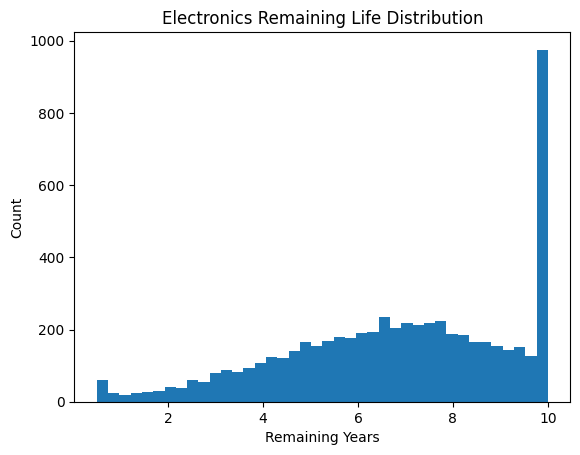

In [10]:
plt.hist(df_electronics["Electronics_Remaining_Years"], bins=40)
plt.xlabel("Remaining Years")
plt.ylabel("Count")
plt.title("Electronics Remaining Life Distribution")
plt.show()


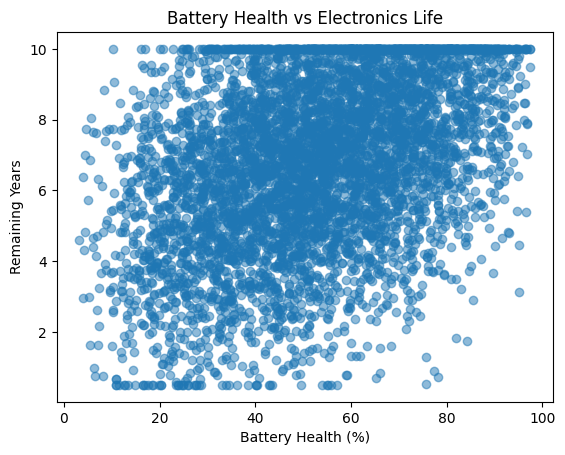

In [11]:
plt.scatter(
    df_electronics["Battery_Health"],
    df_electronics["Electronics_Remaining_Years"],
    alpha=0.5
)
plt.xlabel("Battery Health (%)")
plt.ylabel("Remaining Years")
plt.title("Battery Health vs Electronics Life")
plt.show()


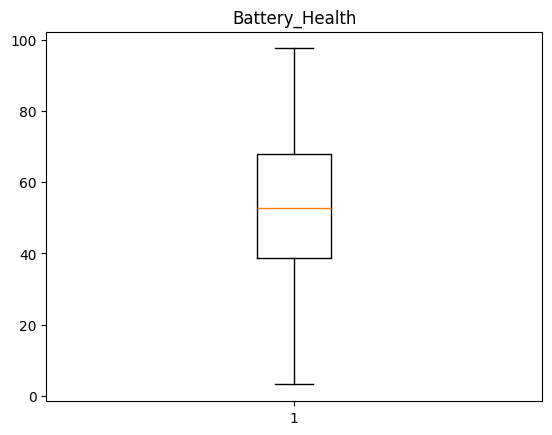

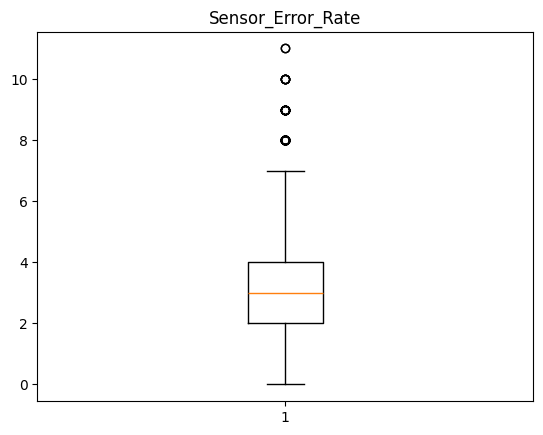

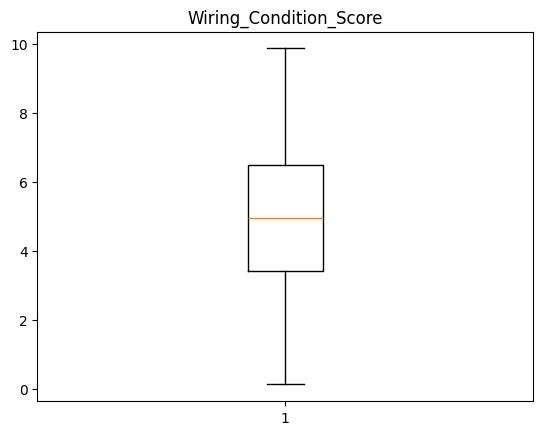

In [12]:
features = [
    "Battery_Health",
    "Sensor_Error_Rate",
    "Wiring_Condition_Score"
]

for col in features:
    plt.boxplot(df_electronics[col].dropna())
    plt.title(col)
    plt.show()


In [13]:
feature_cols = [
    "Battery_Health",
    "Sensor_Error_Rate",
    "Wiring_Condition_Score"
    
]
df_electronics['Sensor_Error_Rate']=df_electronics['Sensor_Error_Rate'].fillna(df_electronics['Sensor_Error_Rate'].mode()[0])
for col in feature_cols:
    df_electronics[col] = df_electronics[col].fillna(df_electronics[col].median())

In [14]:
df_electronics.isna().sum()

Car_ID                         0
Battery_Health                 0
Sensor_Error_Rate              0
Wiring_Condition_Score         0
Electronics_Remaining_Years    0
dtype: int64

In [15]:
x = df_electronics.drop(
    columns=["Electronics_Remaining_Years", "Car_ID"]
)
y = df_electronics["Electronics_Remaining_Years"]

In [16]:
for col in x.columns:
    lower = x[col].quantile(0.01)
    upper = x[col].quantile(0.99)
    x[col] = x[col].clip(lower, upper)


In [17]:
df_electronics.describe()

,Car_ID,Battery_Health,Sensor_Error_Rate,Wiring_Condition_Score,Electronics_Remaining_Years
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,3000.500000,52.912526,2.986000,4.961630,6.856753
std,1732.195139,19.305598,1.702827,2.040903,2.389197
min,1.000000,3.233416,0.000000,0.132287,0.500000
25%,1500.750000,39.576685,2.000000,3.420646,5.208087
50%,3000.500000,52.890373,3.000000,4.967770,7.043394
75%,4500.250000,66.689706,4.000000,6.501879,8.889447
max,6000.000000,97.517319,11.000000,9.869921,10.000000


In [18]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42
)


In [19]:
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=8,
    random_state=42
)


model.fit(x_train, y_train)


,n_estimators,300
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,8
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
y_pred = model.predict(x_test)

print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2  :", r2_score(y_test, y_pred))


MAE : 1.180685073486191
RMSE: 1.476599878880527
R2  : 0.6209268408403152


In [22]:
import joblib

joblib.dump(model, "electronics_model.pkl")


['electronics_model.pkl']